Use Apple's stock as an example to create some graphs and analysis

Reference:
http://tetration.xyz/lumpsum_vs_dca/

In [10]:
import pandas as pd
import pandas_datareader.data as web
import datetime
pd.set_option('display.width', 200) # Displaying more columns in one row

# Data date range, Google provides up to 4000 entries in one call
start = datetime.datetime(2017, 9, 1) 
end = datetime.datetime(2017, 9, 10)

spy = web.DataReader("AAPL", "yahoo", start, end)

print(spy.head()) # See first few rows

                  Open        High         Low       Close   Adj Close    Volume
Date                                                                            
2017-09-01  164.800003  164.940002  163.630005  164.050003  164.050003  16591100
2017-09-05  163.750000  164.250000  160.559998  162.080002  162.080002  29468500
2017-09-06  162.710007  162.990005  160.520004  161.910004  161.910004  21651700
2017-09-07  162.089996  162.240005  160.360001  161.259995  161.259995  21928500
2017-09-08  160.860001  161.149994  158.529999  158.630005  158.630005  28352600


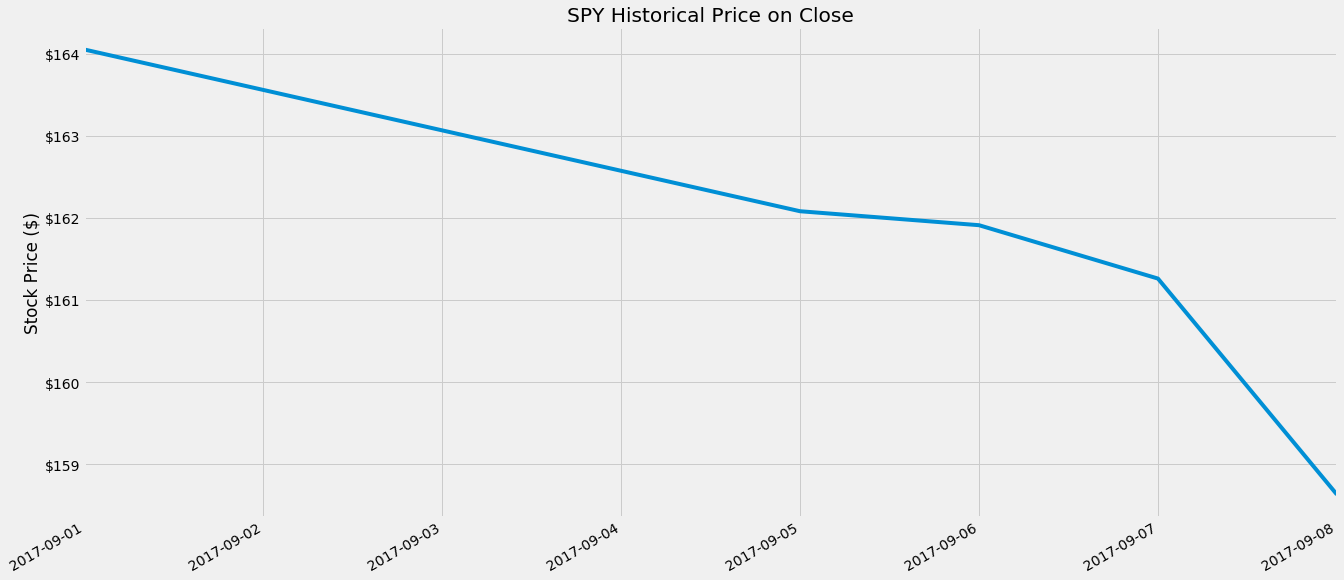

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import style
style.use('fivethirtyeight')

spy['Adj Close'].plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('AAPL Historical Price on Close')
plt.xlabel('')
plt.ylabel('Stock Price ($)');

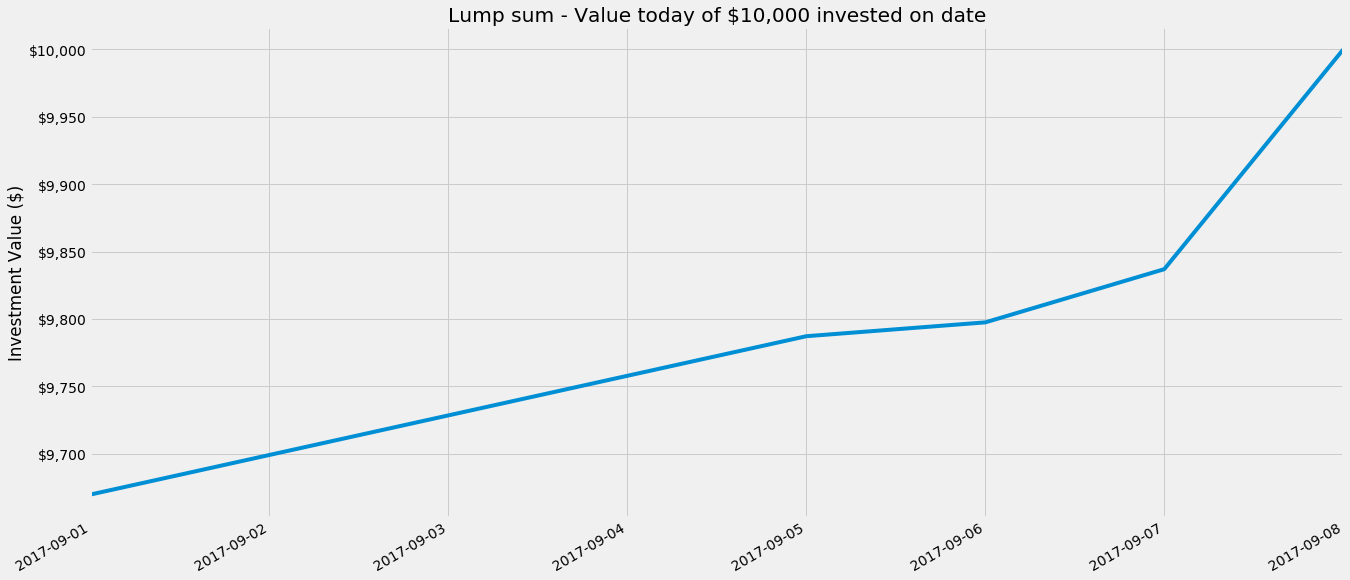

In [7]:
value_price = spy['Adj Close'][-1] # The final value of our stock
initial_investment = 10000 # Our initial investment of $10k

num_stocks_bought = initial_investment / spy['Adj Close']
lumpsum = num_stocks_bought * value_price
lumpsum.name = 'Lump Sum'

lumpsum.plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('Lump sum - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)');

In [8]:
def doDCA(investment, start_date):
    # Get 12 investment dates in 30 day increments starting from start date
    investment_dates_all = pd.date_range(start_date,periods=12,freq='30D')
    # Remove those dates beyond our known data range
    investment_dates = investment_dates_all[investment_dates_all < spy.index[-1]]

    # Get closest business dates with available data
    closest_investment_dates = spy.index.searchsorted(investment_dates)

    # How much to invest on each date
    portion = investment/12.0 # (Python 3.0 does implicit double conversion, Python 2.7 does not)

    # Get the total of all stocks purchased for each of those dates (on the Close)
    stocks_invested = sum(portion / spy['Adj Close'][closest_investment_dates])

    # Add uninvested amount back
    uninvested_dollars = portion * sum(investment_dates_all >= spy.index[-1])

    # value of stocks today
    total_value = value_price*stocks_invested + uninvested_dollars
    return total_value

# Generate DCA series for every possible date
dca = pd.Series(spy.index.map(lambda x: doDCA(initial_investment, x)), index=spy.index, name='Dollar Cost Averaging (DCA)')

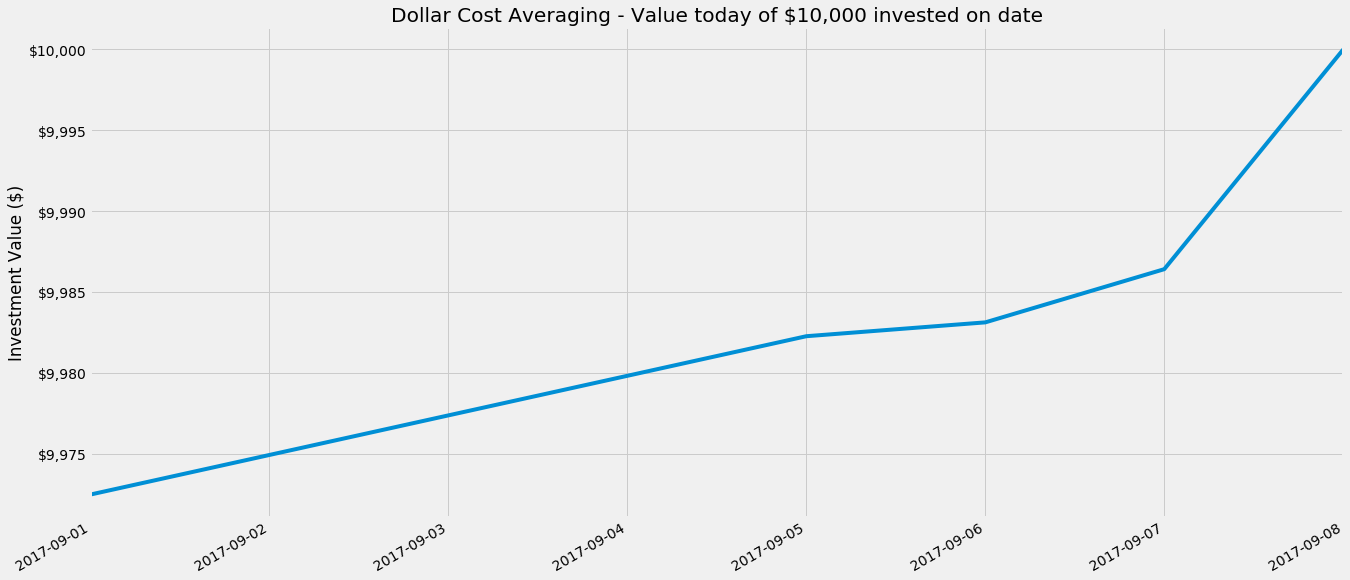

In [9]:
dca.plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('Dollar Cost Averaging - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)');
